In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 100

In [2]:
da_prices_files = ['GUI_ENERGY_PRICES_201412312300-201512312300_UTC.csv',
         'GUI_ENERGY_PRICES_201512312300-201612312300_UTC.csv',
         'GUI_ENERGY_PRICES_201612312300-201712312300_UTC.csv',
         'GUI_ENERGY_PRICES_201712312300-201812312300 - 1_UTC.csv',
         'GUI_ENERGY_PRICES_201712312300-201812312300 - 2_UTC.csv',
         'GUI_ENERGY_PRICES_201912312300-202012312300_UTC.csv',
         'GUI_ENERGY_PRICES_202012312300-202112312300_UTC.csv',
         'GUI_ENERGY_PRICES_202112312300-202212312300_UTC.csv',
         'GUI_ENERGY_PRICES_202212312300-202312312300_UTC.csv',
         'GUI_ENERGY_PRICES_202312312300-202412312300_UTC.csv',
         'GUI_ENERGY_PRICES_202412312300-202512312300_UTC.csv'
         ]
load_files = ['GUI_TOTAL_LOAD_DAYAHEAD_201412312300-201512312300_UTC.csv',
              'GUI_TOTAL_LOAD_DAYAHEAD_201512312300-201612312300_UTC.csv',
              'GUI_TOTAL_LOAD_DAYAHEAD_201612312300-201712312300_UTC.csv',
              'GUI_TOTAL_LOAD_DAYAHEAD_201712312300-201812312300-1_UTC.csv',
              'GUI_TOTAL_LOAD_DAYAHEAD_201712312300-201812312300-2_UTC.csv',
              'GUI_TOTAL_LOAD_DAYAHEAD_201812312300-201912312300_UTC.csv',
              'GUI_TOTAL_LOAD_DAYAHEAD_201912312300-202012312300_UTC.csv',
              'GUI_TOTAL_LOAD_DAYAHEAD_202012312300-202112312300_UTC.csv',
              'GUI_TOTAL_LOAD_DAYAHEAD_202112312300-202212312300_UTC.csv',
              'GUI_TOTAL_LOAD_DAYAHEAD_202212312300-202312312300_UTC.csv',
              'GUI_TOTAL_LOAD_DAYAHEAD_202312312300-202412312300_UTC.csv'
              
]

In [3]:
da_prices_df =[]
load_df=[]
for file in da_prices_files:
    da_prices_df.append(pd.read_csv('../data/da_prices/'+file))
    
for file in load_files:
    load_df.append(pd.read_csv('../data/load/'+file))

In [4]:
df_price = pd.concat(da_prices_df,axis=0,ignore_index=True)
df_load = pd.concat(load_df,axis=0,ignore_index=True)

In [6]:
df_load.head()

,MTU (CET/CEST),Area,Actual Total Load (MW),Day-ahead Total Load Forecast (MW),MTU (CET/CEST) Start,MTU (CET/CEST) End,SummerIndicator,MTU (CET/CEST) End UTC
0,01/01/2015 00:00 - 01/01/2015 00:15,BZN|DE-AT-LU,51873.64,50136.87,01/01/2015 00:00,2015-01-01T00:15,CET,2014-12-31T23:15
1,01/01/2015 00:15 - 01/01/2015 00:30,BZN|DE-AT-LU,51382.96,49545.46,01/01/2015 00:15,2015-01-01T00:30,CET,2014-12-31T23:30
2,01/01/2015 00:30 - 01/01/2015 00:45,BZN|DE-AT-LU,51444.18,49067.14,01/01/2015 00:30,2015-01-01T00:45,CET,2014-12-31T23:45
3,01/01/2015 00:45 - 01/01/2015 01:00,BZN|DE-AT-LU,51268.75,48475.53,01/01/2015 00:45,2015-01-01T01:00,CET,2015-01-01T00:00
4,01/01/2015 01:00 - 01/01/2015 01:15,BZN|DE-AT-LU,50869.89,47452.32,01/01/2015 01:00,2015-01-01T01:15,CET,2015-01-01T00:15


In [7]:

def df_basic_clean(df):
    
    df.columns = df.columns.str.lower().str.replace(' ','_')
    df.drop(columns=['mtu_(cet/cest)','summerindicator'],axis=1,inplace=True)
    df = df.rename(columns={'mtu_(cet/cest)_start':'start_cet','mtu_(cet/cest)_end':'end_cet','mtu_(cet/cest)_end_utc':'end_utc'})
    #df['start_cet'] = df.start_cet.apply(lambda x: x.replace('/','-'))
    df['end_cet'] = df.end_cet.apply(lambda x: x.replace('T',' '))
    df['end_utc'] = df.end_utc.apply(lambda x: x.replace('T',' ')) 
    df['start_cet'] = pd.to_datetime(df['start_cet'],format='%d/%m/%Y %H:%M:%S',errors='coerce')
    df['end_cet'] = pd.to_datetime(df['end_cet'],format='%Y-%m-%d %H:%M',errors='coerce')
    df['end_utc'] = pd.to_datetime(df['end_utc'],format='%Y-%m-%d %H:%M',errors='coerce')
    df = df.assign(
    date = lambda x: x['end_utc'].dt.date,
    year = lambda x: x['end_utc'].dt.year,
    month = lambda x: x['end_utc'].dt.month,
    day = lambda x: x['end_utc'].dt.day,
    dayofyear = lambda x: x['end_utc'].dt.dayofyear,
    hour = lambda x: x['end_utc'].dt.hour)
    return df

In [8]:
df_price= df_basic_clean(df_price)
df_price= df_price.rename(columns={'day-ahead_price_(eur/mwh)':'price'})

In [9]:
df_basic_clean(df_load)

,area,actual_total_load_(mw),day-ahead_total_load_forecast_(mw),start_cet,end_cet,end_utc,date,year,month,day,dayofyear,hour
0,BZN|DE-AT-LU,51873.64,50136.87,NaT,2015-01-01 00:15:00,2014-12-31 23:15:00,2014-12-31,2014,12,31,365,23
1,BZN|DE-AT-LU,51382.96,49545.46,NaT,2015-01-01 00:30:00,2014-12-31 23:30:00,2014-12-31,2014,12,31,365,23
2,BZN|DE-AT-LU,51444.18,49067.14,NaT,2015-01-01 00:45:00,2014-12-31 23:45:00,2014-12-31,2014,12,31,365,23
3,BZN|DE-AT-LU,51268.75,48475.53,NaT,2015-01-01 01:00:00,2015-01-01 00:00:00,2015-01-01,2015,1,1,1,0
4,BZN|DE-AT-LU,50869.89,47452.32,NaT,2015-01-01 01:15:00,2015-01-01 00:15:00,2015-01-01,2015,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
385723,BZN|DE-LU,48711.16,47327.0,NaT,2024-12-31 23:00:00,2024-12-31 22:00:00,2024-12-31,2024,12,31,366,22
385724,BZN|DE-LU,50459.17,46558.39,NaT,2024-12-31 23:15:00,2024-12-31 22:15:00,2024-12-31,2024,12,31,366,22
385725,BZN|DE-LU,50380.0,46016.77,NaT,2024-12-31 23:30:00,2024-12-31 22:30:00,2024-12-31,2024,12,31,366,22
385726,BZN|DE-LU,49342.58,45475.87,NaT,2024-12-31 23:45:00,2024-12-31 22:45:00,2024-12-31,2024,12,31,366,22


In [10]:
df_= df_price.groupby(['date', 'year', 'month', 'day', 'dayofyear'], as_index=False).agg({'price': np.mean}).set_index('date')
df_.head()

,year,month,day,dayofyear,price
date,,,,,
2015-01-05,2015,1,5,5,36.067500
2015-01-06,2015,1,6,6,33.941250
2015-01-07,2015,1,7,7,38.922083
2015-01-08,2015,1,8,8,28.929167
2015-01-09,2015,1,9,9,24.539583


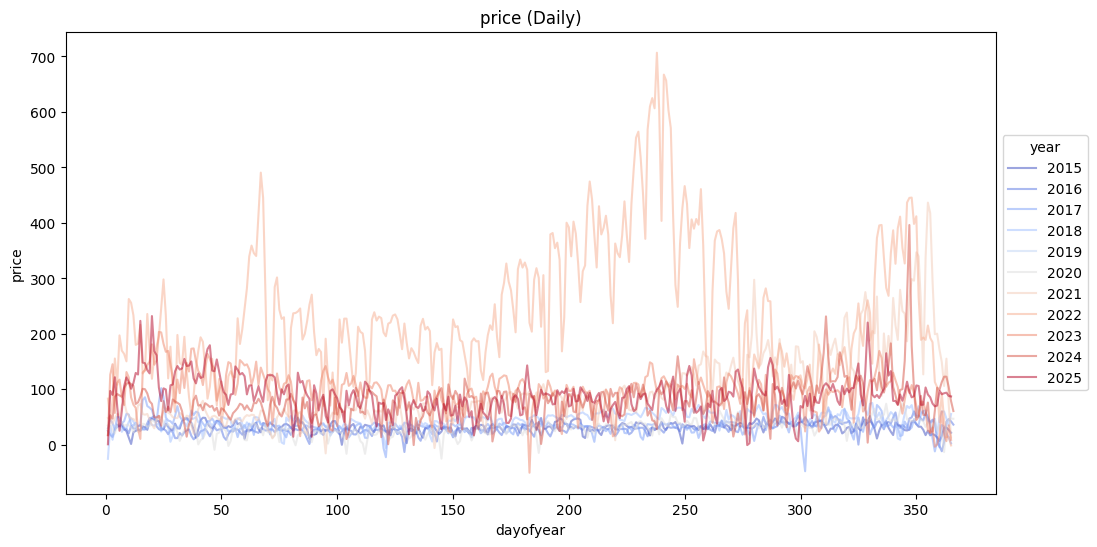

In [14]:
fig, ax = plt.subplots() 

pd.pivot_table(data=df_price[['year', 'dayofyear', 'price']], index='dayofyear', columns='year')['price'].plot(cmap='coolwarm', alpha=0.5, ax=ax)
ax.legend(title='year', loc='center left', bbox_to_anchor=(1, 0.5))
ax.set(title='price (Daily)', ylabel='price');


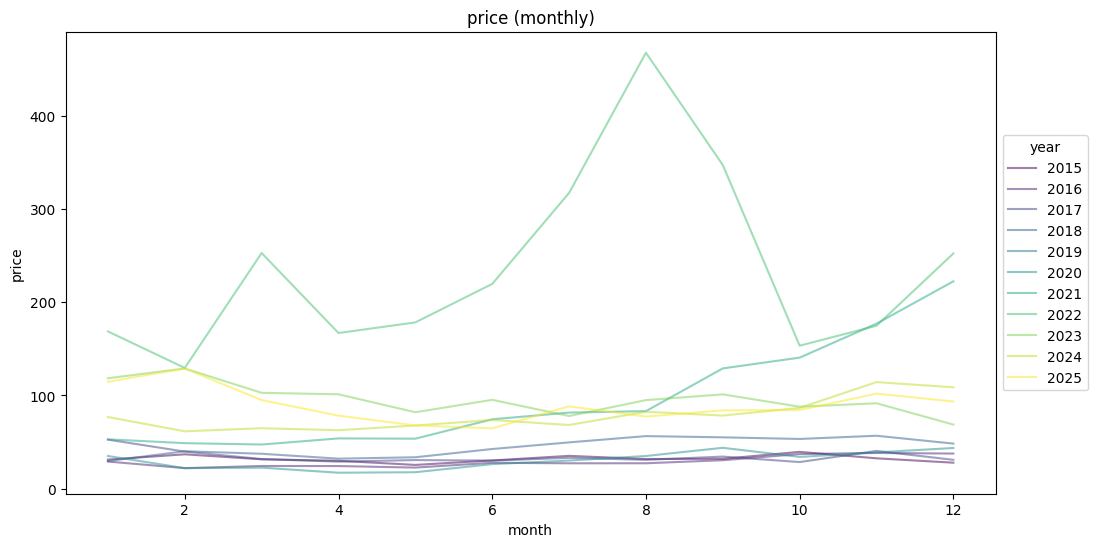

In [17]:
fig, ax = plt.subplots() 

pd.pivot_table(data=df_price[['year', 'month', 'price']], index='month', columns='year')['price'].plot(cmap='viridis', alpha=0.5, ax=ax)
ax.legend(title='year', loc='center left', bbox_to_anchor=(1, 0.5))
ax.set(title='price (monthly)', ylabel='price');


In [18]:
def plot_fun(df):    
    fig, ax = plt.subplots()
    sns.lineplot(x='end_utc', y='price', data=df, ax=ax)
    ax.set(title='price vs time', ylabel='price',xlabel='date')
    plt.grid()

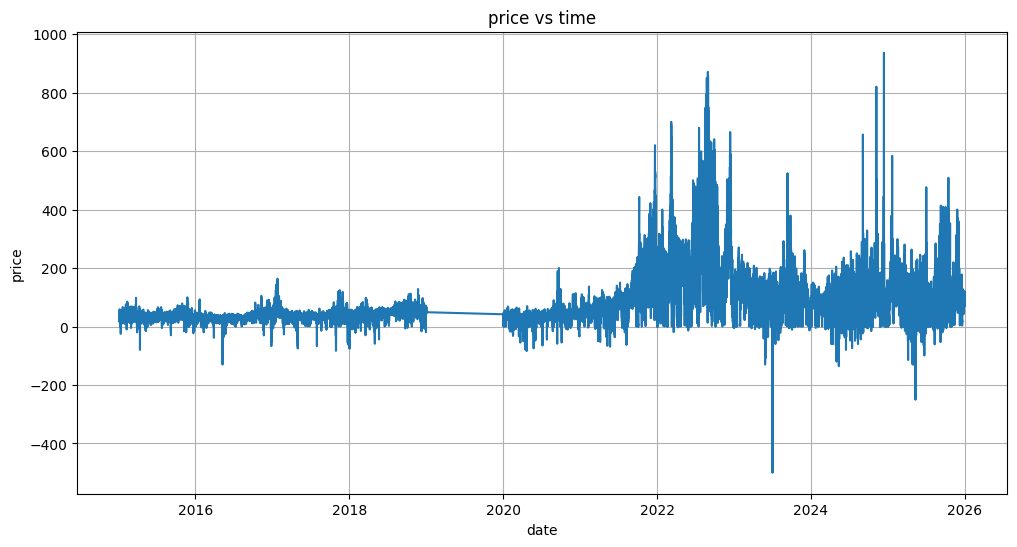

In [19]:
plot_fun(df_price)

In [ ]:
df_price.date == 2018

0         2015-01-05
1         2015-01-05
2         2015-01-05
3         2015-01-05
4         2015-01-05
             ...    
252022    2025-12-31
252023    2025-12-31
252024    2025-12-31
252025    2025-12-31
252026    2025-12-31
Name: date, Length: 252027, dtype: object